# [作業重點]

目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。 今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何
作業

   * 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
   Ans: 會改變

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [15]:
# 讀取wine資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# DecisionTreeClassifier(criterion=’gini’
# , splitter=’best’
# , max_depth=None
# , min_samples_split=2
# , min_samples_leaf=1
# , min_weight_fraction_leaf=0.0
# , max_features=None
# , random_state=None
# , max_leaf_nodes=None
# , min_impurity_decrease=0.0
# , min_impurity_split=None
# , class_weight=None
# , presort=False)
clf = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier(max_depth = 1)

# 訓練模型
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

In [16]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
acc2 = metrics.accuracy_score(y_test, y_pred2)
print("Acuuracy: ", acc2)

Acuuracy:  0.8888888888888888
Acuuracy:  0.6444444444444445


In [17]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [18]:
print("Feature importance: ", clf.feature_importances_)
print("Feature importance: ", clf2.feature_importances_)

Feature importance:  [0.04440705 0.         0.         0.         0.         0.
 0.04296585 0.         0.         0.38107601 0.         0.12444169
 0.4071094 ]
Feature importance:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


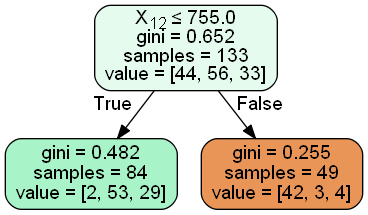

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

* 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [22]:
wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)
wine_tree = DecisionTreeClassifier()
wine_tree.fit(x_train, y_train)
y_pred = wine_tree.predict(x_test)

In [23]:
acu = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acu)

Acuuracy:  0.8888888888888888


In [25]:
print(wine.feature_names)
print("Feature importance: ", wine_tree.feature_importances_)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.01364138 0.         0.         0.         0.04405085 0.
 0.04296585 0.         0.         0.38625023 0.         0.12444169
 0.38865   ]


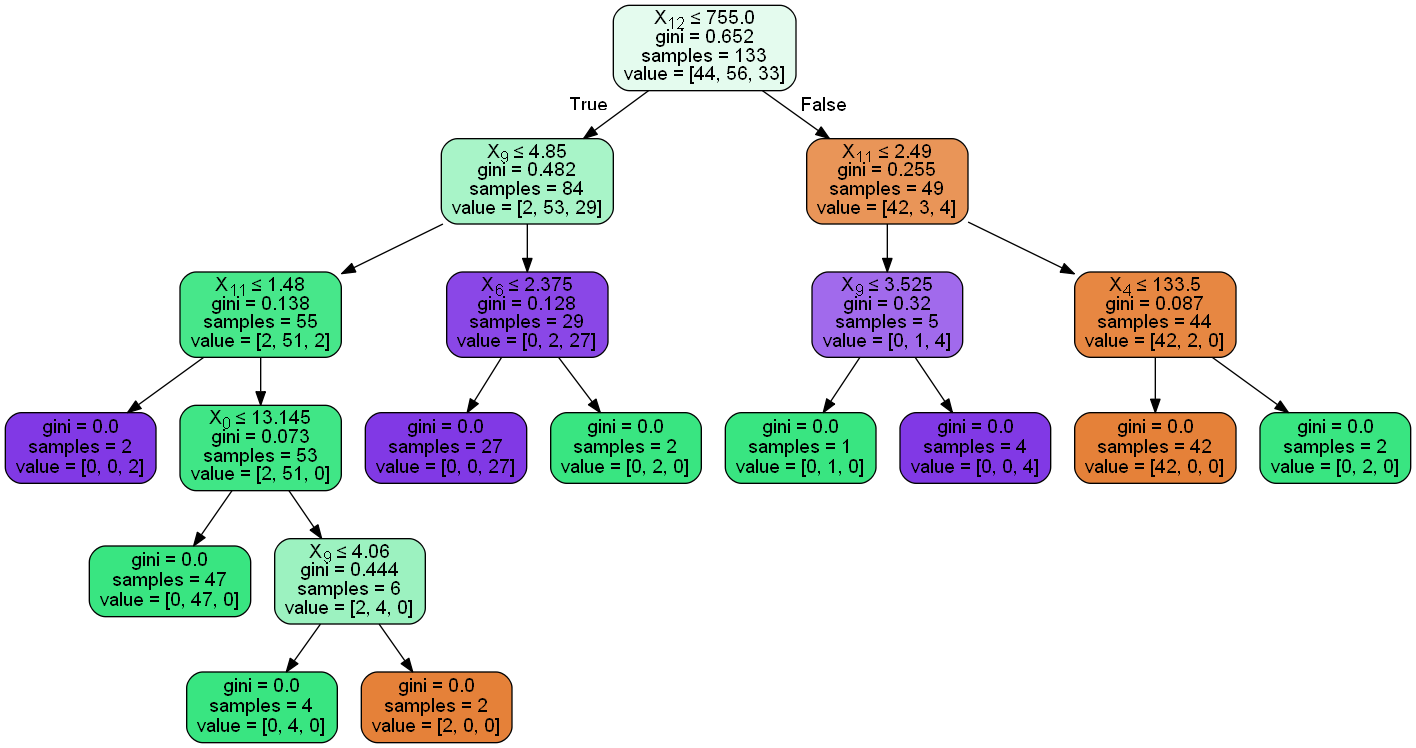

In [26]:
dot_data = StringIO()
export_graphviz(wine_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())